In [1]:
packages = !pip list
for x in packages:
    if "qiskit" in x:
        print(x)

qiskit                1.1.0
qiskit-aer            0.14.1
qiskit-ibm-runtime    0.23.0


In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum",token="e#")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

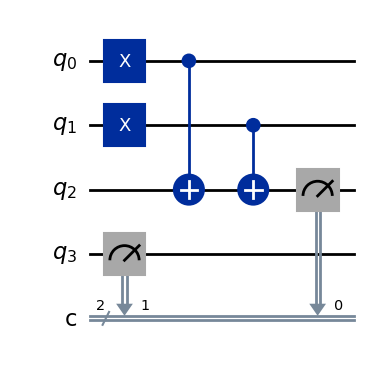

In [3]:
from qiskit import QuantumCircuit,assemble
from qiskit_aer import Aer
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')
qc = QuantumCircuit(4,2)
qc.x(0)
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.measure(2,0)
qc.measure(3,1)
qc.draw('mpl')

{'01': 1024}


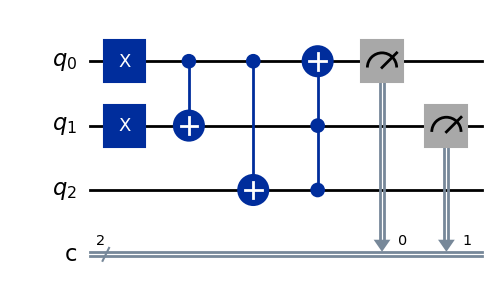

In [4]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
qc = QuantumCircuit(3,2)
qc.x(0)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)
qc.ccx(1,2,0)
qc.measure([0,1],[0,1])
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc,backend)
job = backend.run(new_circuit,shots=1024)
result= job.result()
counts = result.get_counts(qc)
print(counts)
qc.draw('mpl')

{'11': 1024}


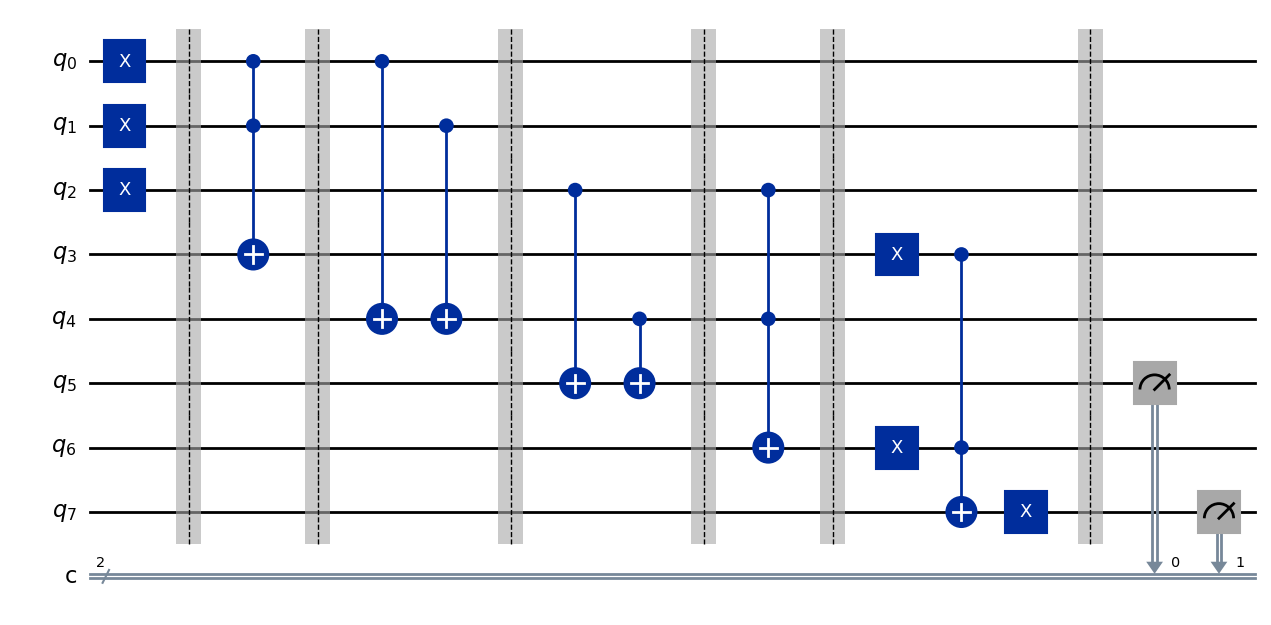

In [5]:
qc = QuantumCircuit(8,2)
# Preparing inputs
qc.x(0) # Comment this line to make Qbit0 = |0>
qc.x(1) # Comment this line to make Qbit1 = |0>
qc.x(2) # Comment this line to make Qbit2 = |0> ( carry-in bit )
qc.barrier()
# AND gate1 implementation
qc.ccx(0,1,3)
qc.barrier()
# OR gate1 implementation
qc.cx(0,4)
qc.cx(1,4)
qc.barrier()
# OR gate2 implementation
qc.cx(2,5)
qc.cx(4,5)
qc.barrier()
# AND gate2 implementation
qc.ccx(2,4,6)
qc.barrier()
# OR gate implementation

qc.x(3)
qc.x(6)
qc.ccx(3,6,7)
qc.x(7)
qc.barrier()
# Measuring and put result to classical bit
qc.measure(5,0) # ( sum )
qc.measure(7,1) # ( carry-out )
# Run the experimient 1024 times and get stats
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc,backend)
job = backend.run(new_circuit,shots=1024)
counts = job.result().get_counts(qc)
print(counts)
qc.draw(output='mpl')

{'01': 1000}


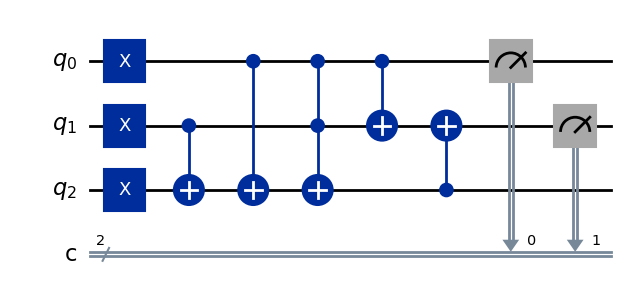

In [6]:
# Create a full subtractor circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)
# Apply the input values to the qubits
qc.x(0) # q_0

qc.x(1) # q_1
qc.x(2) # q_borrow (borrow in)
# Subtraction operation
qc.cx(1, 2) # q_1 --> q_borrow
qc.cx(0, 2) # q_0 --> q_borrow
# Borrow (borrow out)
qc.ccx(0, 1, 2) # q_0, q_1 --> q_borrow
# Difference output
qc.cx(0, 1) # q_0 --> q_1
qc.cx(2, 1) # q_borrow --> q_1
# Measure the result
qc.measure([0, 1], [0, 1])
# Use local simulator Aer
simulator = Aer.get_backend('qasm_simulator')
# Execute the circuit on the simulator
new_circuit = transpile(qc, simulator)
job = simulator.run(new_circuit, shots=1000)
# Get the result counts
result = job.result()
counts = result.get_counts(qc)
print(counts)
qc.draw('mpl')